# 🦠 microbELP

[![microbELP](https://img.shields.io/badge/GitHub-microbELP-181717?logo=github)](https://github.com/omicsNLP/microbELP)


The notebook showcases our visualisation module designed to generate phylogenetic trees of identified microbial taxa. This allows users to visually inspect the microbial composition of individual datasets or compare across different domains or study sections.

# ⚙️ Installation

MicrobELP has a number of dependencies on other Python packages; it is recommended to install it in an isolated environment.

In [ ]:
!git clone https://github.com/omicsNLP/microbELP.git

In [ ]:
!pip install ./microbELP

We are doing a quick check of what is currently available in our directory to monitor the change as we run the code.

In [3]:
!ls

microbELP  sample_data


In order to run the visualisation code, I need input files and for convinence I am collecting the one from our paper [![DOI:10.1101/2021.01.08.425887](http://img.shields.io/badge/DOI-10.1101/2025.08.29.671515-BE2536.svg)](https://doi.org/10.1101/2025.08.29.671515) that we have hosted on Zenodo [![DOI:10.5281/zenodo.17288827](http://img.shields.io/badge/DOI-10.5281/zenodo.17288827-3382C4.svg)](https://doi.org/10.5281/zenodo.17288827).

In [ ]:
!wget https://zenodo.org/records/17288827/files/counts_combined.csv

In [ ]:
!wget https://zenodo.org/records/17288827/files/counts_pharyngeal.csv

After collecting the files, we are doing a second check to see the addition of the microbELP library, and 2 domains files which are CSVs.

In [6]:
!ls

counts_combined.csv  counts_pharyngeal.csv  microbELP  sample_data


Here we can read one file to see its content but we do not keep in memory the read as the library takes as input a path to the files. Here we expect a csv, no header and only one column containing NBCI Taxonomy identifiers. You can learn more about the parameters here [![microbELP](https://img.shields.io/badge/GitHub-microbELP-181717?logo=github)](https://github.com/omicsNLP/microbELP/tree/main?tab=readme-ov-file#-visualisation-module).

In [7]:
import pandas as pd

pd.read_csv('counts_combined.csv',header=None).head()

,0
0,NCBI:txid1485
1,NCBI:txid1678
2,NCBI:txid1680
3,NCBI:txid1681
4,NCBI:txid1685


## 🌲 Single Phylogenetic Tree


For this example, I need one file, in this case the 'Pharyngeal' domain file. I choose to put text in the middle of the figure, not to show the information provided for the construction of the plot and to save the image in a predifined structure without specifing a directory. You can learn more about the parameters here [![microbELP](https://img.shields.io/badge/GitHub-microbELP-181717?logo=github)](https://github.com/omicsNLP/microbELP/tree/main?tab=readme-ov-file#-single-phylogenetic-tree).

/usr/local/lib/python3.12/dist-packages/microbELP/master_positions_handler.py:718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


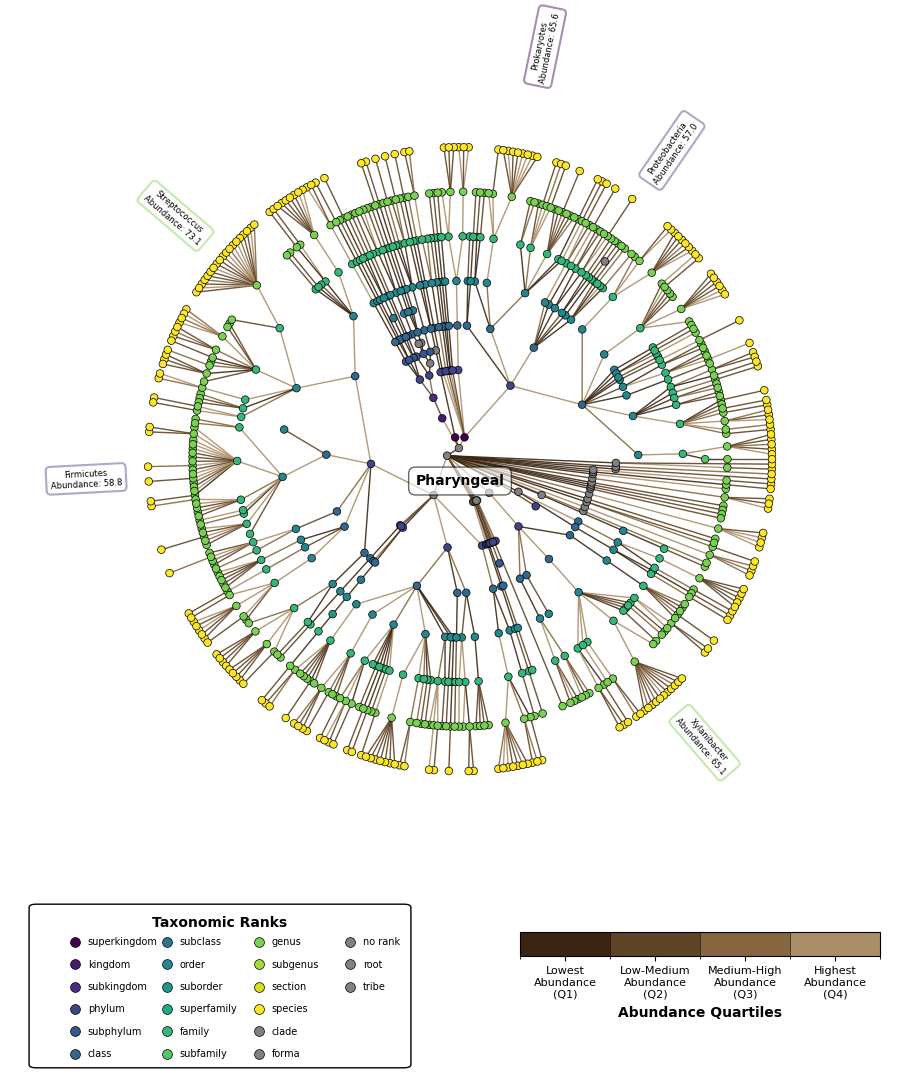

In [8]:
from microbELP import phylogenetic_tree_microbiome

phylogenetic_tree_microbiome('./counts_pharyngeal.csv',
                             figure_text = 'Pharyngeal',
                             verbose = False,
                             save=True)

Let's check if the image as been saved in the newly created directory 'microbiome_visualisation'.

In [9]:
!ls ./microbiome_visualisation

160343_13112025_phylogenetic_tree_microbiome.png


To show that the image is the same, I am going to open the image using supervision and cv2.

In [ ]:
!pip install supervision

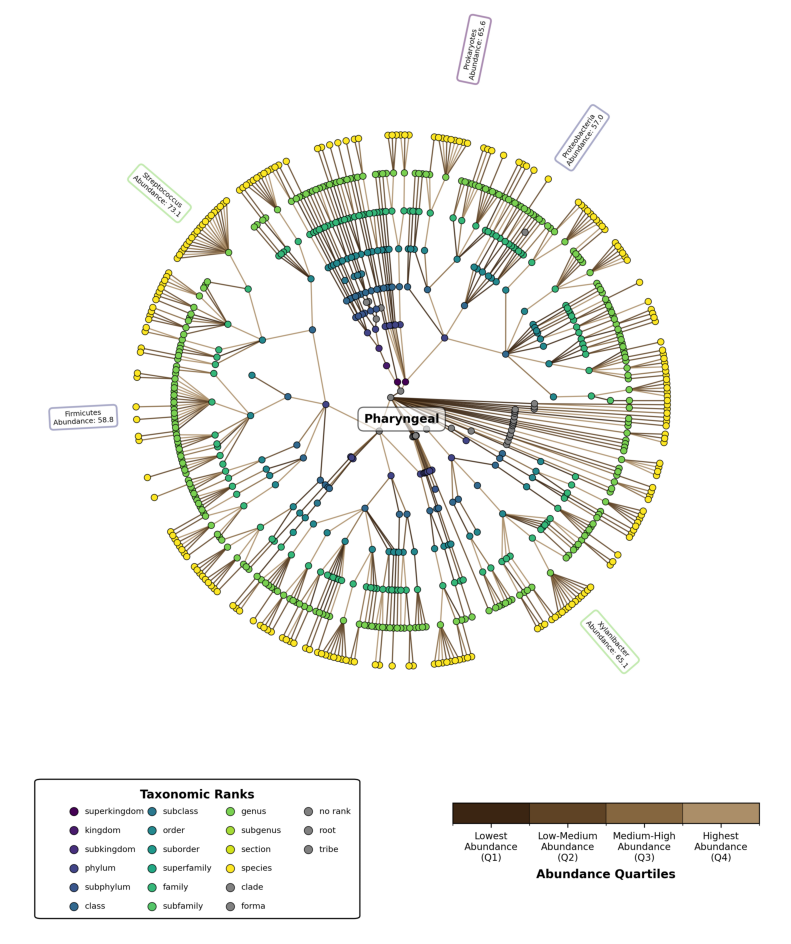

In [11]:
import supervision as sv
import cv2
import glob

image_name = glob.glob('./microbiome_visualisation/*.png')[0]


image = cv2.imread(image_name)
sv.plot_image(image)

## 🌴 Comparative Phylogenetic Tree

Finally, I am going to use the comparative phylogenetic tree, to compare microbial profiles between the Pharyngeal domain and all domain. You can learn more about the parameters here [![microbELP](https://img.shields.io/badge/GitHub-microbELP-181717?logo=github)](https://github.com/omicsNLP/microbELP/tree/main?tab=readme-ov-file#-comparative-phylogenetic-tree).

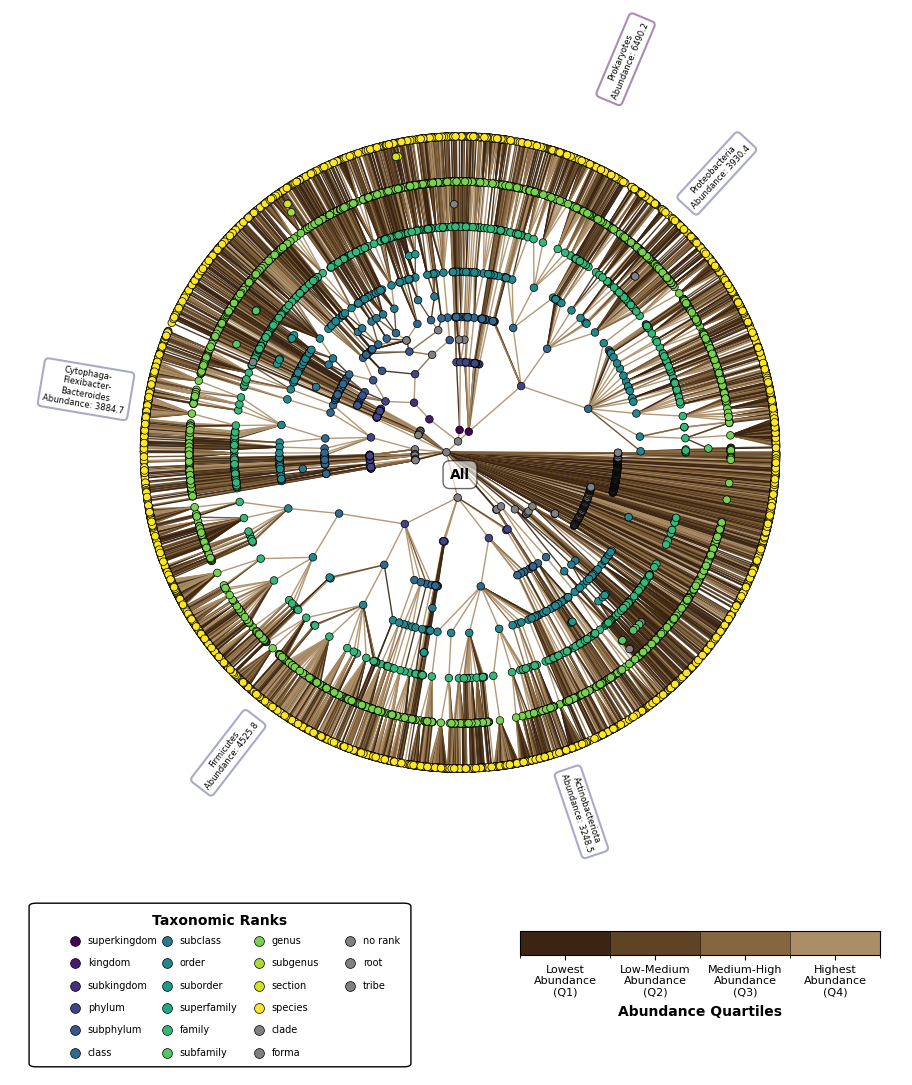

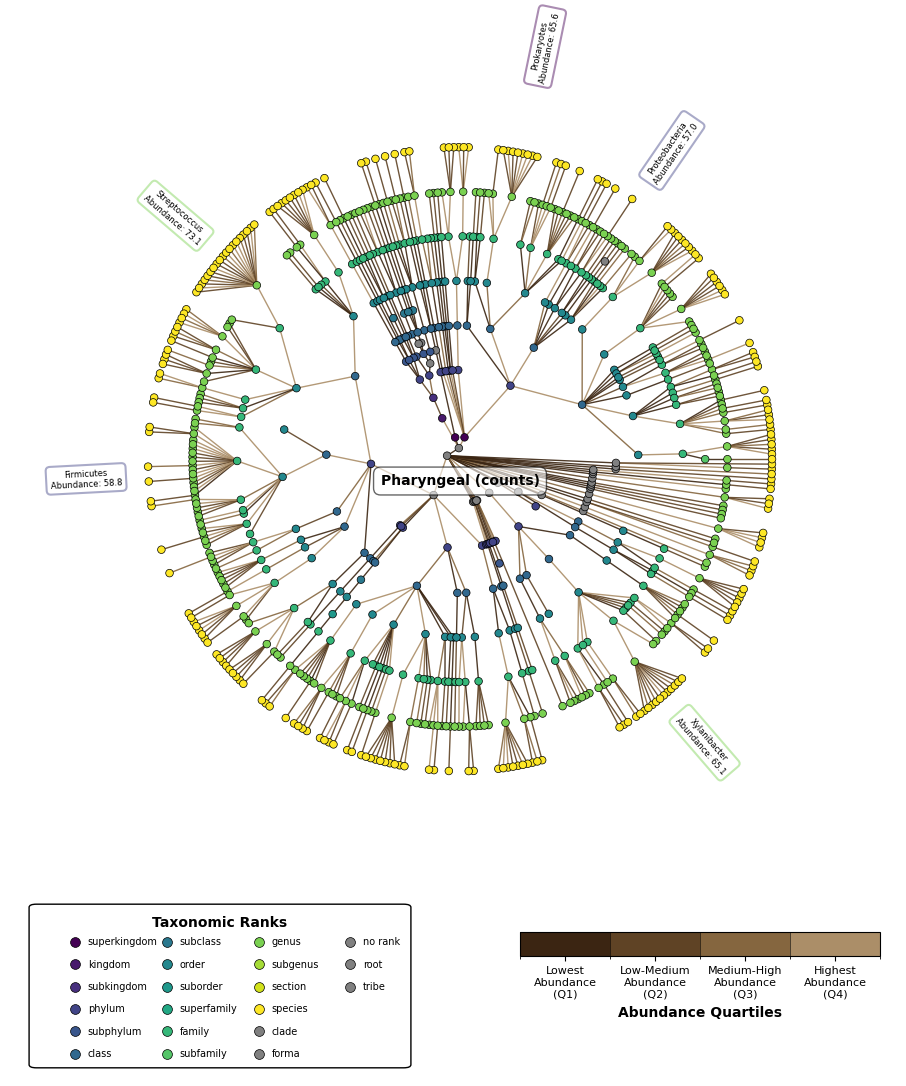

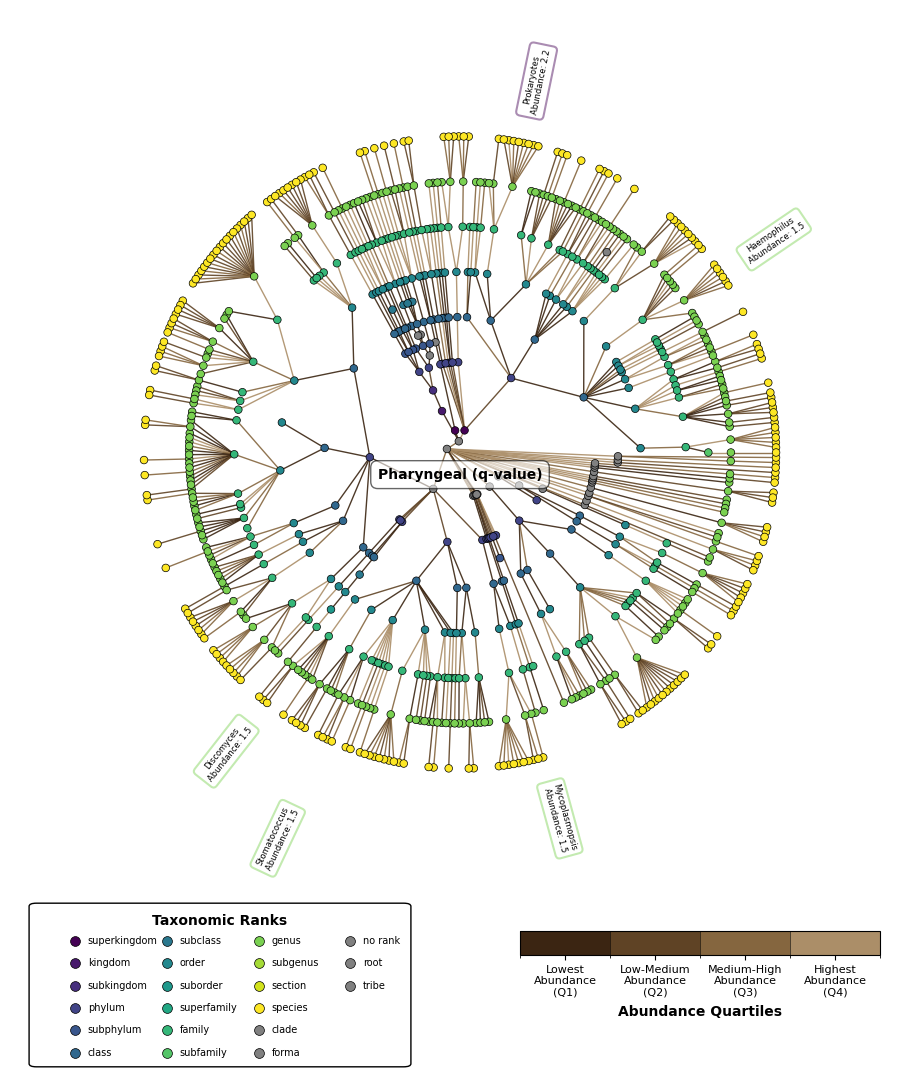

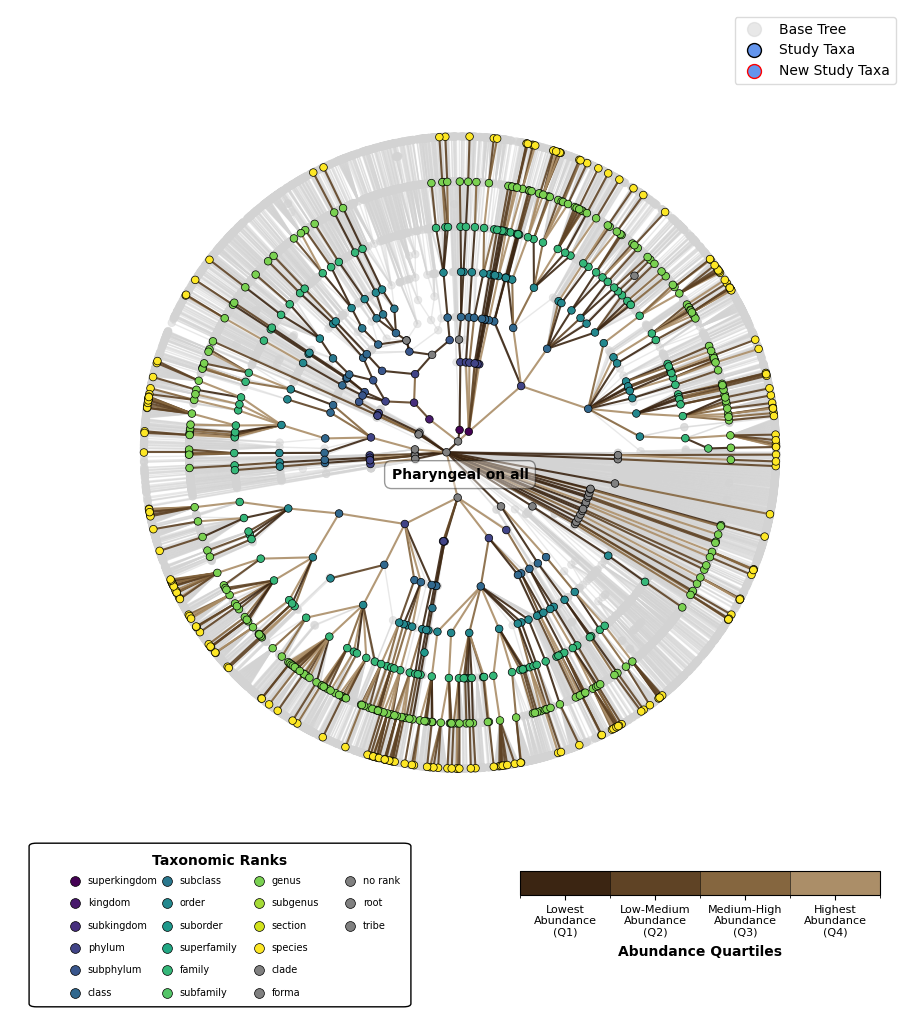

In [12]:
from microbELP import comparative_phylogenetic_tree_microbiome

comparative_phylogenetic_tree_microbiome('./counts_combined.csv',
                                         './counts_pharyngeal.csv',
                                         back_text='All',
                                         front_text='Pharyngeal',
                                         overlap_text='Pharyngeal on all',
                                         verbose = False)